## Aplicación de la Calibración a una Imagen

Con base en el ejemplo de calibración en Python, realizar la calibración de una cámara (puede ser una cámara web, o la cámara de la computadora) usando OpenCV. Utilizar al menos 20 im´agenes obtenidas con la  misma cámara (adquiridas usando OpenCV). Mostrar evidencia de los pasos seguidos. Como resultado final mostrar la matriz de calibración y los coeficientes de distorsión, así como una imagen antes y después de la calibración (según la calidad de la cámara podría no notarse mucho la corrección de la imagen).

## Desarrollo
Para la cámara se utilizará la webcam de una laptop, y el tablero presentará las mismas dimensiones del ejemplo. 

En primer lugar se instalan las librerias necesarias:

In [52]:
import numpy as np
import matplotlib.pyplot as plt   # Para mostrar las imágenes
import glob                       # Para importar los nombres de las imágenes

# Importar OpenCV
import cv2

# Grabar los valores usando pickle
import pickle

Luego se cargan las imágenes tomadas con la cámara de la laptop.

In [53]:
# Lista de los nombres de las imágenes usadas para la calibración
image_names = glob.glob('Imagenes/Photo*.png')
print(image_names)

['Imagenes/Photo on 28-04-23 at 10.20 #5.png', 'Imagenes/Photo on 28-04-23 at 10.20 #4.png', 'Imagenes/Photo on 28-04-23 at 10.30 #2.png', 'Imagenes/Photo on 28-04-23 at 10.22 #2.png', 'Imagenes/Photo on 28-04-23 at 10.28.png', 'Imagenes/Photo on 28-04-23 at 10.20 #3.png', 'Imagenes/Photo on 28-04-23 at 10.20 #2.png', 'Imagenes/Photo on 28-04-23 at 10.32 #2.png', 'Imagenes/Photo on 28-04-23 at 10.17.png', 'Imagenes/Photo on 28-04-23 at 10.24 #2.png', 'Imagenes/Photo on 28-04-23 at 10.24 #3.png', 'Imagenes/Photo on 28-04-23 at 10.24 #4.png', 'Imagenes/Photo on 28-04-23 at 10.23 #2.png', 'Imagenes/Photo on 28-04-23 at 10.23 #3.png', 'Imagenes/Photo on 28-04-23 at 10.19 #2.png', 'Imagenes/Photo on 28-04-23 at 10.23 #4.png', 'Imagenes/Photo on 28-04-23 at 10.23 #5.png', 'Imagenes/Photo on 28-04-23 at 10.19 #4.png', 'Imagenes/Photo on 28-04-23 at 10.21 #2.png', 'Imagenes/Photo on 28-04-23 at 10.17 #2.png', 'Imagenes/Photo on 28-04-23 at 10.32.png', 'Imagenes/Photo on 28-04-23 at 10.30.png',

A continuación se agregan las matrices necesarias de la información del tablero. Dado que se usan las intesecciones internas, se tienen 8 horizontales y 6 verticales. 

In [54]:
# Preparar los puntos del objeto: (0,0,0), (1,0,0), (2,0,0) ..., (7,5,0)
nx = 8; ny = 6
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(nx*ny,2)

print("Primeros puntos:"); print(objp[0:3])
print("Últimos puntos:"); print(objp[-4:])

Primeros puntos:
[[0. 0. 0.]
 [1. 0. 0.]
 [2. 0. 0.]]
Últimos puntos:
[[4. 5. 0.]
 [5. 5. 0.]
 [6. 5. 0.]
 [7. 5. 0.]]


Seguidamente se obtienen las esquinas internas del tablero de cada imagen. Para ello se usa la función `findChessboardCorners`.

In [55]:
# Listas que almacenan los puntos del objeto (índices) y los puntos de la imagen (corners)
# para todas las imágenes
obj_points = []     # Puntos del objeto (3d)
img_points = []     # Puntos de la imagen (2d)

# Bucle a lo largo de todas las imágenes, buscando las "esquinas" (corners)
for idx, iname in enumerate(image_names):
    # Leer la imagen
    I = cv2.imread(iname)
    # Convertir a escala de grises
    Igray = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

    # Encontrar las esquinas (corners) internas del patrón
    retval, corners = cv2.findChessboardCorners(Igray, (nx,ny), None)

    # Si se encuentra los puntos, añadirlos a la lista
    if retval == True:
        # Puntos del objeto y puntos de la imagen, para la imagen actual
        obj_points.append(objp)
        img_points.append(corners)

        # Añadir a la imagen los puntos (corners) encontrados
        cv2.drawChessboardCorners(I, (8,6), corners, retval)
    
        cv2.imshow('Imagen con puntos esquina', I)
        cv2.waitKey(500)

cv2.destroyAllWindows()

A continuación se realiza la calibracion de la cámara una vez obtenido los parámetros intrínsecos y extrínsecos. Para ello se utiliza la función `calibrateCamera`

In [56]:
# Calibración de la cámara dados los puntos objeto (3D) y los puntos imágen (corners) correspondientes
I_size = (I.shape[1], I.shape[0])
retval, M, coefs_dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, I_size, None, None)

# Mostrar los los parámetros
print("Matriz de calibración:"); print(np.round(M,3))
print("\nCoeficientes de distorsión:"); print(np.round(coefs_dist,3))

Matriz de calibración:
[[971.256   0.    562.36 ]
 [  0.    972.771 389.702]
 [  0.      0.      1.   ]]

Coeficientes de distorsión:
[[-4.100e-02  9.940e-01  1.200e-02  2.000e-03 -3.325e+00]]


In [58]:
Iorig = cv2.imread('Test.png')

[ WARN:0@1095.578] global loadsave.cpp:244 findDecoder imread_('Test.png'): can't open/read file: check file path/integrity


Finalmente, se muestran las imágenes antes y después de calibrar la cámara.

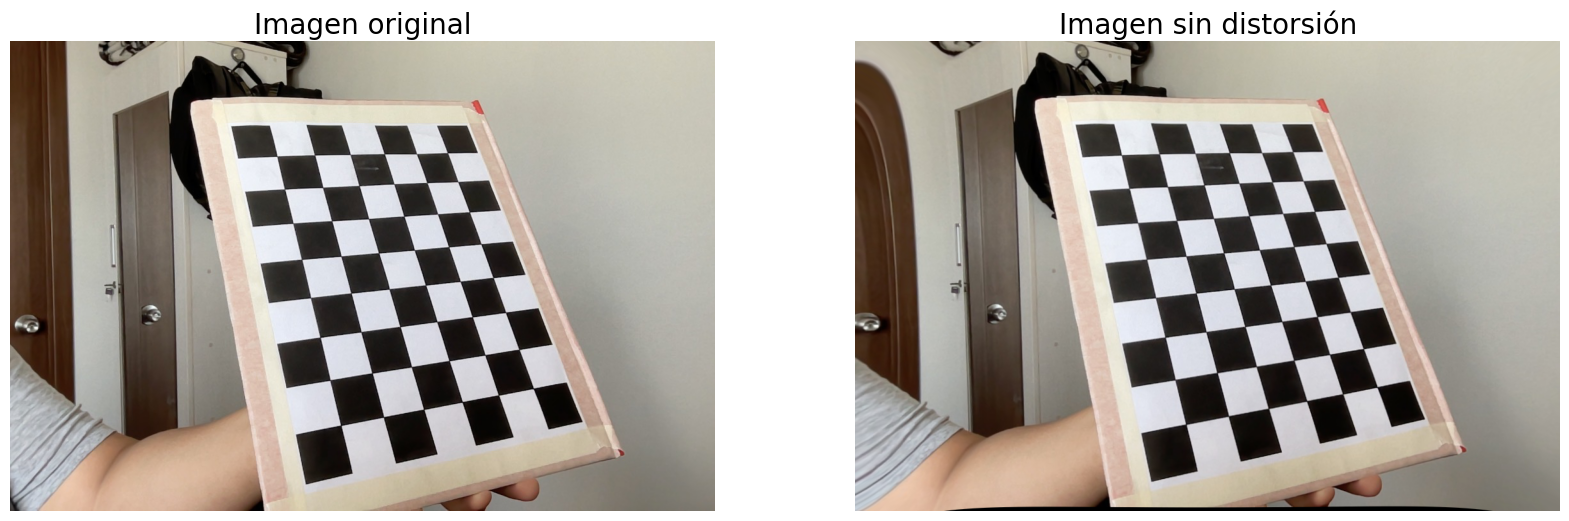

: 

In [59]:
# Imagen de entrada
Iorig = cv2.imread('/Users/jim/Documents/GitHub/2023_1_Robotica_Autonoma/Tareas/Test.png')
Iorig_rgb = cv2.cvtColor(Iorig, cv2.COLOR_BGR2RGB)

# Corregir la distorsión
Iundist = cv2.undistort(Iorig, M, coefs_dist, None)
Iundist_rgb = cv2.cvtColor(Iundist, cv2.COLOR_BGR2RGB)

# Visualize undistortion
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(Iorig_rgb)
ax1.set_title('Imagen original', fontsize=20); ax1.axis('off')
ax2.imshow(Iundist_rgb)
ax2.set_title('Imagen sin distorsión', fontsize=20); ax2.axis('off');